### Display of student performance file and creation of dummy variables

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('Student Performance new.csv')
df.head().style.background_gradient(axis=0)

,Unnamed: 0,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex
0,0,group B,bachelor's degree,standard,none,0.720000,0.720000,0.740000,F
1,1,group C,some college,standard,completed,0.690000,0.900000,0.880000,F
2,2,group B,master's degree,standard,none,0.900000,0.950000,0.930000,F
3,3,group A,associate's degree,free/reduced,none,0.470000,0.570000,0.440000,M
4,4,group C,some college,standard,none,0.760000,0.780000,0.750000,M


In [3]:
df.columns

Index(['Unnamed: 0', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math percentage',
       'reading score percentage', 'writing score percentage', 'sex'],
      dtype='object')

In [4]:
df.isnull().sum()

Unnamed: 0                     0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math percentage                0
reading score percentage       0
writing score percentage       0
sex                            0
dtype: int64

In [5]:
new_df = pd.get_dummies(df, columns = ['parental level of education','race/ethnicity',
                        'lunch','test preparation course', 'sex'] ,drop_first=True,
                        prefix='Dumy',prefix_sep="*" )
new_df.head().style.background_gradient(axis=0)

,Unnamed: 0,math percentage,reading score percentage,writing score percentage,Dumy*bachelor's degree,Dumy*high school,Dumy*master's degree,Dumy*some college,Dumy*some high school,Dumy*group B,Dumy*group C,Dumy*group D,Dumy*group E,Dumy*standard,Dumy*none,Dumy*M
0,0,0.720000,0.720000,0.740000,1,0,0,0,0,1,0,0,0,1,1,0
1,1,0.690000,0.900000,0.880000,0,0,0,1,0,0,1,0,0,1,0,0
2,2,0.900000,0.950000,0.930000,0,0,1,0,0,1,0,0,0,1,1,0
3,3,0.470000,0.570000,0.440000,0,0,0,0,0,0,0,0,0,0,1,1
4,4,0.760000,0.780000,0.750000,0,0,0,1,0,0,1,0,0,1,1,1


### Modification of dataframe

In [6]:
new_df = new_df.drop(['Unnamed: 0'], axis=1)

In [7]:
new_df

,math percentage,reading score percentage,writing score percentage,Dumy*bachelor's degree,Dumy*high school,Dumy*master's degree,Dumy*some college,Dumy*some high school,Dumy*group B,Dumy*group C,Dumy*group D,Dumy*group E,Dumy*standard,Dumy*none,Dumy*M
0,0.72,0.72,0.74,1,0,0,0,0,1,0,0,0,1,1,0
1,0.69,0.90,0.88,0,0,0,1,0,0,1,0,0,1,0,0
2,0.90,0.95,0.93,0,0,1,0,0,1,0,0,0,1,1,0
3,0.47,0.57,0.44,0,0,0,0,0,0,0,0,0,0,1,1
4,0.76,0.78,0.75,0,0,0,1,0,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.88,0.99,0.95,0,0,1,0,0,0,0,0,1,1,0,0
996,0.62,0.55,0.55,0,1,0,0,0,0,1,0,0,0,1,1
997,0.59,0.71,0.65,0,1,0,0,0,0,1,0,0,0,0,0
998,0.68,0.78,0.77,0,0,0,1,0,0,0,1,0,1,0,0


### Dendogram of dataframe and scatter plot of math and reading scores by clusters

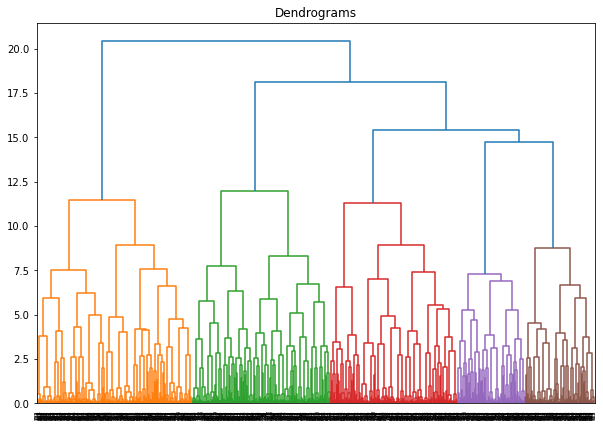

In [8]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(new_df, method='ward'))

In [9]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='cosine', linkage='average')  
cluster.fit_predict(new_df)

array([3, 0, 3, 4, 0, 3, 3, 3, 4, 3, 0, 4, 3, 1, 4, 0, 0, 2, 0, 0, 4, 3,
       4, 0, 0, 0, 3, 0, 0, 4, 4, 3, 1, 4, 1, 1, 4, 2, 4, 3, 0, 0, 3, 3,
       1, 3, 0, 0, 4, 0, 1, 1, 0, 4, 0, 0, 1, 4, 4, 2, 0, 2, 4, 0, 2, 2,
       2, 0, 3, 0, 4, 4, 4, 0, 0, 3, 2, 0, 2, 1, 3, 3, 1, 1, 4, 0, 0, 4,
       0, 2, 0, 0, 0, 0, 3, 0, 2, 1, 4, 0, 3, 0, 4, 3, 0, 0, 4, 1, 3, 2,
       4, 0, 4, 4, 0, 0, 3, 0, 2, 0, 0, 3, 0, 4, 1, 3, 2, 4, 4, 0, 4, 0,
       1, 0, 0, 0, 2, 1, 0, 4, 2, 0, 1, 0, 4, 0, 2, 0, 0, 1, 2, 0, 3, 0,
       2, 0, 1, 3, 3, 4, 3, 1, 3, 0, 1, 0, 0, 3, 3, 0, 1, 2, 4, 0, 0, 0,
       3, 0, 3, 2, 0, 0, 1, 4, 0, 0, 1, 2, 2, 0, 1, 4, 2, 4, 0, 4, 0, 0,
       3, 3, 0, 4, 0, 3, 0, 2, 0, 1, 3, 3, 2, 0, 0, 0, 1, 2, 1, 0, 3, 2,
       4, 3, 2, 2, 3, 1, 0, 4, 2, 0, 4, 0, 3, 2, 0, 4, 0, 2, 3, 0, 4, 0,
       4, 1, 2, 0, 1, 3, 3, 0, 2, 4, 2, 4, 4, 1, 0, 0, 3, 0, 0, 0, 2, 1,
       4, 2, 0, 4, 4, 1, 0, 0, 4, 4, 3, 0, 0, 1, 2, 3, 4, 4, 4, 4, 2, 3,
       1, 2, 3, 1, 0, 2, 0, 0, 4, 3, 2, 1, 0, 4, 1,

Text(0, 0.5, 'Reading score percentage')

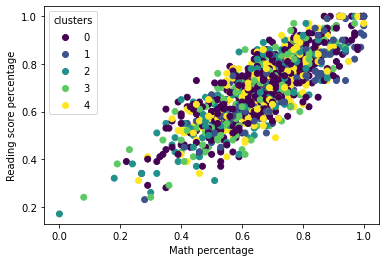

In [10]:
fig, ax = plt.subplots()
sc = ax.scatter(new_df['math percentage'], new_df['reading score percentage'], 
                c=cluster.labels_)
ax.legend(*sc.legend_elements(), title='clusters')
plt.xlabel('Math percentage')
plt.ylabel('Reading score percentage')

In [11]:
label_count = pd.Series(cluster.labels_).value_counts()
label_count

0    390
4    203
3    155
2    127
1    125
dtype: int64

### KNN clustering of students based on completion of a test preparation course

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
X = new_df.drop(['Dumy*none'], axis=1)
y = new_df.iloc[:,-2]
neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [14]:
y_predicted = neigh.predict(X)
y_predicted

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,

In [15]:
new_df2 = new_df
new_df2['cluster'] = y_predicted
new_df2.head()

,math percentage,reading score percentage,writing score percentage,Dumy*bachelor's degree,Dumy*high school,Dumy*master's degree,Dumy*some college,Dumy*some high school,Dumy*group B,Dumy*group C,Dumy*group D,Dumy*group E,Dumy*standard,Dumy*none,Dumy*M,cluster
0,0.72,0.72,0.74,1,0,0,0,0,1,0,0,0,1,1,0,1
1,0.69,0.90,0.88,0,0,0,1,0,0,1,0,0,1,0,0,0
2,0.90,0.95,0.93,0,0,1,0,0,1,0,0,0,1,1,0,0
3,0.47,0.57,0.44,0,0,0,0,0,0,0,0,0,0,1,1,1
4,0.76,0.78,0.75,0,0,0,1,0,0,1,0,0,1,1,1,1


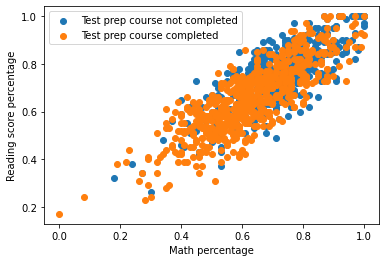

In [16]:
df1 = new_df2[new_df2.cluster==0]
df2 = new_df2[new_df2.cluster==1]
plt.scatter(df1['math percentage'], df1['reading score percentage'], label='Test prep course not completed')
plt.scatter(df2['math percentage'], df2['reading score percentage'], label='Test prep course completed')
plt.xlabel('Math percentage')
plt.ylabel('Reading score percentage')
plt.legend()

In [17]:
label_count = pd.Series(y_predicted).value_counts()
label_count

1    634
0    366
dtype: int64

### KNN clustering of students based on race

### i.

In [18]:
new_df3 = pd.get_dummies(df, columns=['parental level of education','lunch',
                        'test preparation course', 'sex'] ,drop_first=True,
                         prefix='Dumy',prefix_sep="*" )
new_df3.head().style.background_gradient(axis=0)

,Unnamed: 0,race/ethnicity,math percentage,reading score percentage,writing score percentage,Dumy*bachelor's degree,Dumy*high school,Dumy*master's degree,Dumy*some college,Dumy*some high school,Dumy*standard,Dumy*none,Dumy*M
0,0,group B,0.720000,0.720000,0.740000,1,0,0,0,0,1,1,0
1,1,group C,0.690000,0.900000,0.880000,0,0,0,1,0,1,0,0
2,2,group B,0.900000,0.950000,0.930000,0,0,1,0,0,1,1,0
3,3,group A,0.470000,0.570000,0.440000,0,0,0,0,0,0,1,1
4,4,group C,0.760000,0.780000,0.750000,0,0,0,1,0,1,1,1


In [19]:
new_df3 = new_df3.drop(['Unnamed: 0'], axis=1)
new_df3

,race/ethnicity,math percentage,reading score percentage,writing score percentage,Dumy*bachelor's degree,Dumy*high school,Dumy*master's degree,Dumy*some college,Dumy*some high school,Dumy*standard,Dumy*none,Dumy*M
0,group B,0.72,0.72,0.74,1,0,0,0,0,1,1,0
1,group C,0.69,0.90,0.88,0,0,0,1,0,1,0,0
2,group B,0.90,0.95,0.93,0,0,1,0,0,1,1,0
3,group A,0.47,0.57,0.44,0,0,0,0,0,0,1,1
4,group C,0.76,0.78,0.75,0,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,group E,0.88,0.99,0.95,0,0,1,0,0,1,0,0
996,group C,0.62,0.55,0.55,0,1,0,0,0,0,1,1
997,group C,0.59,0.71,0.65,0,1,0,0,0,0,0,0
998,group D,0.68,0.78,0.77,0,0,0,1,0,1,0,0


In [20]:
X2 = new_df3.drop(['race/ethnicity'], axis=1)
y2 = new_df3.iloc[:,0]
neigh2 = KNeighborsClassifier(n_neighbors=6)
neigh2.fit(X2, y2)

KNeighborsClassifier(n_neighbors=6)

In [21]:
y_predicted2 = neigh2.predict(X2)

In [22]:
df_mod = new_df3
df_mod = df_mod.drop(['race/ethnicity'], axis=1)
df_mod['cluster'] = y_predicted2
df_mod.head()

,math percentage,reading score percentage,writing score percentage,Dumy*bachelor's degree,Dumy*high school,Dumy*master's degree,Dumy*some college,Dumy*some high school,Dumy*standard,Dumy*none,Dumy*M,cluster
0,0.72,0.72,0.74,1,0,0,0,0,1,1,0,group B
1,0.69,0.90,0.88,0,0,0,1,0,1,0,0,group C
2,0.90,0.95,0.93,0,0,1,0,0,1,1,0,group D
3,0.47,0.57,0.44,0,0,0,0,0,0,1,1,group C
4,0.76,0.78,0.75,0,0,0,1,0,1,1,1,group E


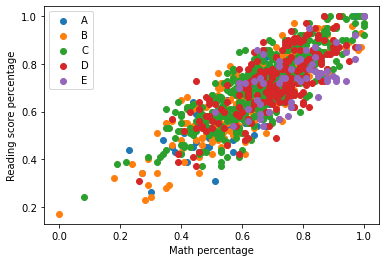

In [23]:
df3 = df_mod[df_mod.cluster=='group A']
df4 = df_mod[df_mod.cluster=='group B']
df5 = df_mod[df_mod.cluster=='group C']
df6 = df_mod[df_mod.cluster=='group D']
df7 = df_mod[df_mod.cluster=='group E']
plt.scatter(df3['math percentage'], df3['reading score percentage'], label='A')
plt.scatter(df4['math percentage'], df4['reading score percentage'], label='B')
plt.scatter(df5['math percentage'], df5['reading score percentage'], label='C')
plt.scatter(df6['math percentage'], df6['reading score percentage'], label='D')
plt.scatter(df7['math percentage'], df7['reading score percentage'], label='E')
plt.xlabel('Math percentage')
plt.ylabel('Reading score percentage')
plt.legend()

### ii.

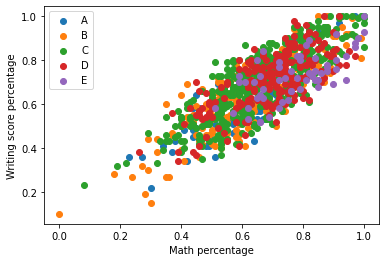

In [24]:
plt.scatter(df3['math percentage'], df3['writing score percentage'], label='A')
plt.scatter(df4['math percentage'], df4['writing score percentage'], label='B')
plt.scatter(df5['math percentage'], df5['writing score percentage'], label='C')
plt.scatter(df6['math percentage'], df6['writing score percentage'], label='D')
plt.scatter(df7['math percentage'], df7['writing score percentage'], label='E')
plt.xlabel('Math percentage')
plt.ylabel('Writing score percentage')
plt.legend()

### iii.

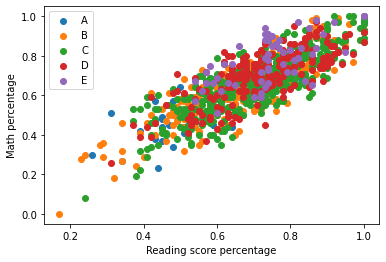

In [25]:
plt.scatter(df3['reading score percentage'], df3['math percentage'], label='A')
plt.scatter(df4['reading score percentage'], df4['math percentage'], label='B')
plt.scatter(df5['reading score percentage'], df5['math percentage'], label='C')
plt.scatter(df6['reading score percentage'], df6['math percentage'], label='D')
plt.scatter(df7['reading score percentage'], df7['math percentage'], label='E')
plt.xlabel('Reading score percentage')
plt.ylabel('Math percentage')
plt.legend()

### iv.

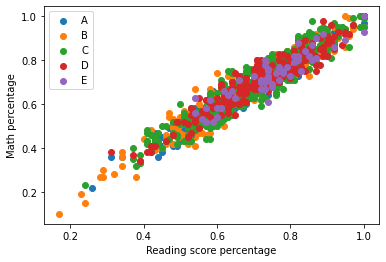

In [26]:
plt.scatter(df3['reading score percentage'], df3['writing score percentage'], label='A')
plt.scatter(df4['reading score percentage'], df4['writing score percentage'], label='B')
plt.scatter(df5['reading score percentage'], df5['writing score percentage'], label='C')
plt.scatter(df6['reading score percentage'], df6['writing score percentage'], label='D')
plt.scatter(df7['reading score percentage'], df7['writing score percentage'], label='E')
plt.xlabel('Reading score percentage')
plt.ylabel('Math percentage')
plt.legend()

### v.

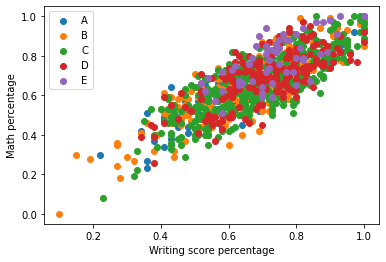

In [27]:
plt.scatter(df3['writing score percentage'], df3['math percentage'], label='A')
plt.scatter(df4['writing score percentage'], df4['math percentage'], label='B')
plt.scatter(df5['writing score percentage'], df5['math percentage'], label='C')
plt.scatter(df6['writing score percentage'], df6['math percentage'], label='D')
plt.scatter(df7['writing score percentage'], df7['math percentage'], label='E')
plt.xlabel('Writing score percentage')
plt.ylabel('Math percentage')
plt.legend()

### vi.

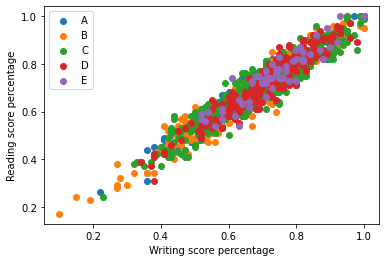

In [28]:
plt.scatter(df3['writing score percentage'], df3['reading score percentage'], label='A')
plt.scatter(df4['writing score percentage'], df4['reading score percentage'], label='B')
plt.scatter(df5['writing score percentage'], df5['reading score percentage'], label='C')
plt.scatter(df6['writing score percentage'], df6['reading score percentage'], label='D')
plt.scatter(df7['writing score percentage'], df7['reading score percentage'], label='E')
plt.xlabel('Writing score percentage')
plt.ylabel('Reading score percentage')
plt.legend()